## Bangluru House Price Prediction using Machine Learning

**Import all Required Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split

**Importing Dataset**

In [2]:
df_house = pd.read_csv('Bengaluru_House_Dataset.csv')
df_house.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df_house.shape

(13320, 9)

In [4]:
df_house.describe(include= 'object')

,area_type,availability,location,size,society,total_sqft
count,13320,13320,13319,13304,7818,13320
unique,4,81,1305,31,2688,2117
top,Super built-up Area,Ready To Move,Whitefield,2 BHK,GrrvaGr,1200
freq,8790,10581,540,5199,80,843


**Missing value Analysis**

In [5]:
df_house.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [6]:
df_house.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [7]:
df_house.isnull().sum()*100/len(df_house)

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

In [8]:
# drop society as it has more than 41% missing values 
df_house.drop(columns = ["society","availability"],inplace = True)

In [9]:
df_house.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [10]:
# Total missing value after dropping some columns
df_house.isna().sum()

area_type       0
location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [11]:
# Fill missing value with most repeated value.
df_house['location'] = df_house['location'].fillna(df_house['location'].mode()[0])

In [12]:
df_house['size'].mode() # most repeated value

0    2 BHK
Name: size, dtype: object

In [13]:
df_house['size'] = df_house['size'].fillna(df_house['size'].mode()[0]) # because it is catagorical field

In [14]:
df_house['balcony'] = df_house['balcony'].fillna(df_house['balcony'].mode()[0])

In [15]:
# Drop missing value  with average of column.
df_house['bath'] = df_house['bath'].fillna(df_house['bath'].median())

In [16]:
# remaining missing values
# df.dropna(inplace = True)
df_house.isna().sum() # no missing value remaining

area_type     0
location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [17]:
# extract rooms information from size
df_house['bhk'] = df_house['size'].str.split().str.get(0).astype(int)

In [18]:
df_house['total_sqft'].unique() 

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

**Outlier Analysis**

<Axes: >

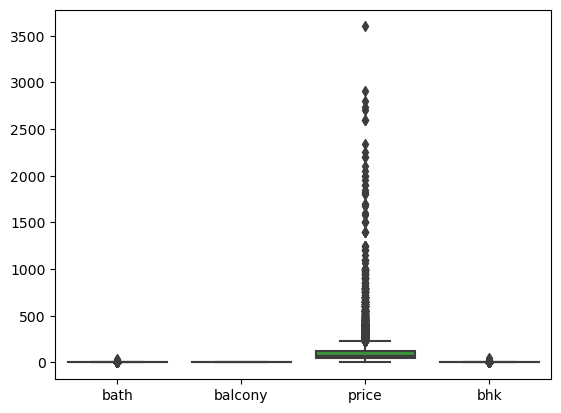

In [19]:
# BoX plot for NUmeric columns
sns.boxplot(data = df_house)

In [20]:
# some data are not in range 
# that must be down to a singl value
def convertRange(x):
    
    temp = x.split('-')
    if len(temp) == 2:
        return (float(temp[0]) + float(temp[1]))/2
    try:
        return float(x)
    except:
        return None

In [21]:
df_house['total_sqft'] = df_house['total_sqft'].apply(convertRange)

In [22]:
df_house['price_per_sqft'] = df_house['price']*100000 / df_house['total_sqft']
df_house.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [23]:
#  Extracting name of places
df_house['location'] = df_house['location'].apply(lambda x: x.strip())
location_count = df_house.location.value_counts()

In [24]:
# Diffrent places with count of 10 or less.
other = location_count[location_count<=10]
other

Dairy Circle                      10
Nagappa Reddy Layout              10
Basapura                          10
1st Block Koramangala             10
Sector 1 HSR Layout               10
                                  ..
Bapuji Layout                      1
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
singapura paradise                 1
Abshot Layout                      1
Name: location, Length: 1053, dtype: int64

In [25]:
#combine all the catagories in Other whose count is less than 10
df_house['location'] = df_house['location'].apply(lambda x: 'other' if x in other else x)

In [26]:
df_house['location'].value_counts()

other                 2885
Whitefield             542
Sarjapur  Road         399
Electronic City        304
Kanakpura Road         273
                      ... 
Nehru Nagar             11
Banjara Layout          11
LB Shastri Nagar        11
Pattandur Agrahara      11
Narayanapura            11
Name: location, Length: 242, dtype: int64

In [27]:
df_house

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,5 Bedroom,3453.0,4.0,0.0,231.00,5,6689.834926
13316,Super built-up Area,other,4 BHK,3600.0,5.0,2.0,400.00,4,11111.111111
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.0,60.00,2,5258.545136
13318,Super built-up Area,Padmanabhanagar,4 BHK,4689.0,4.0,1.0,488.00,4,10407.336319


In [28]:
df_house.describe()

,total_sqft,bath,balcony,price,bhk,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,1.603378,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,0.803067,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,0.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,1.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,2.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3.000000,3600.000000,43.000000,1.200000e+07


In total_sqft min is '1' sqft which is logically error

<Axes: >

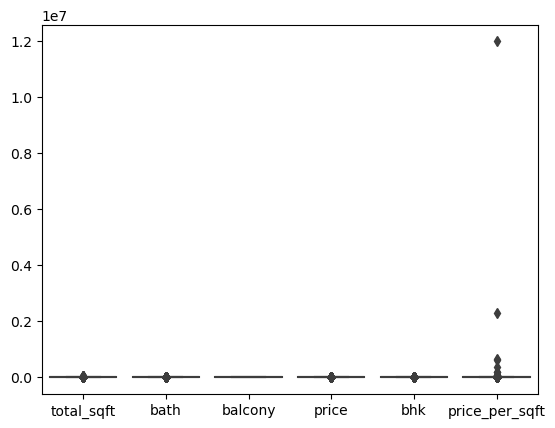

In [29]:
sns.boxplot(data = df_house)

In [30]:
import warnings
warnings.filterwarnings('ignore')

In [31]:
# outlier analysis for numeric varibles 
# push value into range
cols = df_house.select_dtypes([np.number]).columns
Q1 = df_house.quantile(0.25)
Q3 = df_house.quantile(0.75)
IQR = Q3 - Q1
   
low = Q1- 1.5*IQR
upper = Q1 + 1.5*IQR
new_df = df_house[~((df_house < low) | (df_house > upper))]
new_df.dropna(inplace = True)

In [32]:
new_df.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2.0,3699.810606
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3.0,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2.0,4250.000000
5,Super built-up Area,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,2.0,3247.863248
8,Super built-up Area,Marathahalli,3 BHK,1310.0,3.0,1.0,63.25,3.0,4828.244275


In [33]:
new_df.describe()

,total_sqft,bath,balcony,price,bhk,price_per_sqft
count,8464.000000,8464.000000,8464.000000,8464.000000,8464.000000,8464.000000
mean,1220.236946,2.123937,1.395912,62.142433,2.278828,5008.911830
std,299.742311,0.518930,0.615517,26.143621,0.580917,1371.699270
min,284.000000,1.000000,0.000000,8.000000,1.000000,625.185185
25%,1055.750000,2.000000,1.000000,43.842500,2.000000,3999.295622
50%,1200.000000,2.000000,1.000000,57.000000,2.000000,4881.457390
75%,1400.000000,2.000000,2.000000,75.485000,3.000000,5905.564103
max,1960.000000,3.000000,2.000000,155.000000,3.000000,8823.529412


In [34]:
new_df.shape

(8464, 9)

In [35]:
def bhk_outlier(df_house):
    exclude_indices = np.array([])
    for location, location_df in df_house.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft <(stats['mean'])].index.values)
    return df_house.drop(exclude_indices,axis = "index")

In [36]:
final_data = bhk_outlier(new_df)

In [37]:
final_data

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2.0,3699.810606
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3.0,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2.0,4250.000000
12,Super built-up Area,7th Phase JP Nagar,2 BHK,1000.0,2.0,1.0,38.00,2.0,3800.000000
13,Built-up Area,Gottigere,2 BHK,1100.0,2.0,2.0,40.00,2.0,3636.363636
...,...,...,...,...,...,...,...,...,...
13304,Super built-up Area,Raja Rajeshwari Nagar,2 BHK,1187.0,2.0,2.0,40.14,2.0,3381.634372
13312,Super built-up Area,Bellandur,2 BHK,1262.0,2.0,2.0,47.00,2.0,3724.247227
13313,Super built-up Area,Uttarahalli,3 BHK,1345.0,2.0,1.0,57.00,3.0,4237.918216
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.0,60.00,2.0,5258.545136


In [38]:
final_data.shape

(6216, 9)

In [39]:
final_data.drop(columns = ["size","price_per_sqft"],inplace = True)

In [40]:
final_data.to_csv("Clean_Dataset.csv")

In [41]:
final_data.dtypes

area_type      object
location       object
total_sqft    float64
bath          float64
balcony       float64
price         float64
bhk           float64
dtype: object

In [42]:
final_data.drop(columns = ["area_type","balcony"],inplace = True)

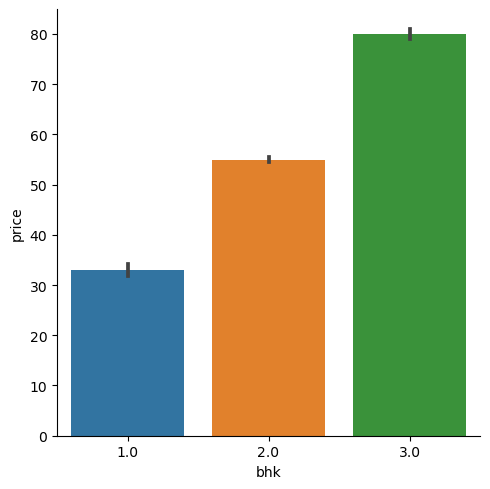

In [43]:
# house type with price in lakhs
sns.catplot(x='bhk',y='price',data=new_df,kind='bar')

**Spliting Dependent and Independent Variable**

In [44]:
x = final_data.drop(columns='price')
y=final_data['price']

In [45]:
x.dtypes

location       object
total_sqft    float64
bath          float64
bhk           float64
dtype: object

In [46]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [47]:
ohe = OneHotEncoder()
ohe.fit(x[['location']])
para = ohe.categories_ # for unknown input from train 

**Creating Pipeline**

In [48]:
# transform data
columns_trans = make_column_transformer((OneHotEncoder(sparse = False,categories = para),['location']),remainder = 'passthrough')

In [49]:
scaler=StandardScaler() # Standarization

**Linear Regression**

In [50]:
lr=LinearRegression() # Linear Regression Model

In [51]:
pipe = make_pipeline(columns_trans,scaler,lr) # Making pipe Line

In [52]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '5th Block Hbr Layout',
       '5th Phase JP Nagar', '6th Phase JP Nagar', '7th Phase JP Nagar',
       '8th Phase JP Nagar', '9th Phase JP Nagar', 'AECS Layout',
       'Abbigere', 'Akshaya Na...
       'Ulsoor', 'Uttarahalli', 'Varthur', 'Varthur Road', 'Vasanthapura',
       'Vidyaranyapura', 'Vijayanagar', 'Vishveshwarya Layout',
       'Vishwapriya Layout', 'Vittasandra', 'Whitefield',
       'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town', 'Yelenahalli',
       'Yeshwanthpur', 'other'], dtype=object)],
                                                                sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [53]:
y_pred_lr = pipe.predict(x_test)
r2_score(y_pred_lr,y_test)

0.7260237254329813

In [54]:
import pickle
pickle.dump(pipe, open("Sample_model_lr.pk1","wb"))

**Lasso Regression**

In [55]:
la = Lasso()

pipe = make_pipeline(columns_trans,scaler,la)

pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '5th Block Hbr Layout',
       '5th Phase JP Nagar', '6th Phase JP Nagar', '7th Phase JP Nagar',
       '8th Phase JP Nagar', '9th Phase JP Nagar', 'AECS Layout',
       'Abbigere', 'Akshaya Na...
       'Thubarahalli', 'Thyagaraja Nagar', 'Tindlu', 'Tumkur Road',
       'Ulsoor', 'Uttarahalli', 'Varthur', 'Varthur Road', 'Vasanthapura',
       'Vidyaranyapura', 'Vijayanagar', 'Vishveshwarya Layout',
       'Vishwapriya Layout', 'Vittasandra', 'Whitefield',
       'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town', 'Yelenahalli',
       'Yeshwanthpur', 'other'], dtype=object)],
                                                                sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [56]:
y_pred_la = pipe.predict(x_test)
r2_score(y_pred_la,y_test)

0.524898731829974

**Random Forest Regression**

In [57]:
from sklearn.ensemble import RandomForestRegressor

In [58]:
rfr = RandomForestRegressor()
pipe = make_pipeline(columns_trans,scaler,rfr)

In [59]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '5th Block Hbr Layout',
       '5th Phase JP Nagar', '6th Phase JP Nagar', '7th Phase JP Nagar',
       '8th Phase JP Nagar', '9th Phase JP Nagar', 'AECS Layout',
       'Abbigere', 'Akshaya Na...
       'Ulsoor', 'Uttarahalli', 'Varthur', 'Varthur Road', 'Vasanthapura',
       'Vidyaranyapura', 'Vijayanagar', 'Vishveshwarya Layout',
       'Vishwapriya Layout', 'Vittasandra', 'Whitefield',
       'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town', 'Yelenahalli',
       'Yeshwanthpur', 'other'], dtype=object)],
                                                                sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor())])

In [60]:
y_pred_la = pipe.predict(x_test)
r2_score(y_pred_la,y_test)

0.7486536954210254

In [61]:
import pickle
pickle.dump(pipe, open("random_forest_model.pkl","wb"))

**XG Boost Regression**

In [62]:
import xgboost as xgb

In [63]:
xgb_r = xgb.XGBRegressor(objective = 'reg:squarederror', n_estimators=500, seed=123)
pipe = make_pipeline(columns_trans,scaler,xgb_r)

In [64]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '5th Block Hbr Layout',
       '5th Phase JP Nagar', '6th Phase JP Nagar', '7th Phase JP Nagar',
       '8th Phase JP Nagar', '9th Phase JP Nagar', 'AECS Layout',
       'Abbigere', 'Akshaya Na...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=500,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

In [65]:
y_pred_xgb = pipe.predict(x_test)
r2_score(y_pred_xgb,y_test)

0.7739148293342775

In [66]:
import pickle
pickle.dump(pipe, open("xgboost_model.pkl","wb"))

**Sample Testing on XGBoost Model**

In [67]:
locations = "7th Phase JP Nagar"
total_sqft = 3289.0
bath = 1.0
bhk = 1.0

In [68]:
input = pd.DataFrame([[locations,total_sqft,bath,bhk]], columns = ['location','total_sqft','bath','bhk'])
prediction = pipe.predict(input)[0]

In [69]:
prediction

133.28438